In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import tree

# S&P 500 Constituents Financial Data
- https://datahub.io/core/s-and-p-500-companies-financials#resource-constituents-financials

In [2]:
# Load S%P 500 constituent data
spdata = pd.read_csv('C:/Users/Erik/Desktop/Stock-Data-Clustering-for-Investment-Decisions/Resources/constituents-financials_csv.csv')

spdata.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
# Data Cleaning
spdata.columns = ['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend_Yield', 'Earnings/Share', 
                  '52_Week_High', '52_Week_Low', 'Market_Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'SEC_Filings']
spdata = spdata.drop(columns=['SEC_Filings'])

#spdata.count()
spdata.dropna(inplace=True)

spdata['Dividend_Yield'] = spdata['Dividend_Yield'].replace({' $-   ': '0'})
spdata['Earnings/Share'] = spdata['Earnings/Share'].replace({' $-   ': '0'})

#Check Dataframe Data Types
#spdata.dtypes

#Change dtypes for columns where replace functions were used
spdata[["Dividend_Yield", "Earnings/Share"]] = spdata[["Dividend_Yield", "Earnings/Share"]].apply(pd.to_numeric)

spdata.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62


# Analysis 1: EBITDA vs. Market Capitalization

### EBITDA
- Earnings Before Interest, Taxes, Depreciation and Amortization
- https://www.investopedia.com/terms/e/ebitda.asp

### Market Capitalization
- Total dollar market value of a company's outstanding shares
- https://www.investopedia.com/terms/m/marketcapitalization.asp

In [4]:
# Create Array of Samples "X1" for EBITDA vs. Market_Cap
X1_df = spdata.loc[:, spdata.columns.intersection(['Market_Cap', 'EBITDA'])]
X1_df.head()
X1 = X1_df.values

In [5]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(X1)

# Predict the clusters
predicted_clusters = kmeans.predict(X1)

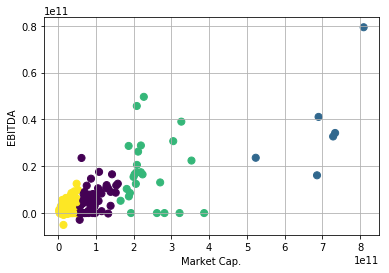

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('Market Cap.')
plt.ylabel('EBITDA')
plt.grid(True)
plt.show()

# Analysis 2: Price/Earnings vs. Price/Book

### Price/Earnings (P/E)
- Higher values typically indicate that investors expect future growth.
- Better when used to compare stocks within the same industry.
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Price/Book (P/B)
- ratio of market value of a stock to its bookvalue
- P/B < 1.0 is typically considered a good investment
- P/B < 3.0 is typically used as a benchmark
- https://www.investopedia.com/terms/p/price-to-bookratio.asp

### The Cluster
- Clusters with Low P/B and High P/E are considered good investments



In [7]:
# Create Array of Samples "X2" for Price/Earnings vs. Price/Book
X2_df = spdata.loc[:, spdata.columns.intersection(['Price/Book', 'Price/Earnings'])]
X2 = X2_df.values

In [8]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X2)

# Predict the clusters
predicted_clusters = kmeans.predict(X2)

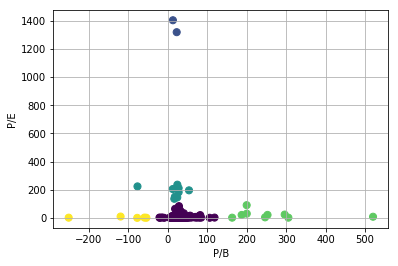

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('P/E')
plt.grid(True)

plt.show()

# Analysis 3: Price/Earnings vs. Price/Sales

### Price/Earnings (P/E) 
- Higher values typically indicate that investors expect future growth
- Better when used to compare stocks within the same industry
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Price/Share (P/S)
- Indicates the market valuation of each dollar of a company's sales
- The lower the P/S ratio, the more attractive the investment
- https://www.investopedia.com/articles/fundamental/03/032603.asp

### The Cluster
- P/E will be plotted against P/S
- The samples will be clustered to determine which stocks are viable investments based on this metric
- The successful clustering will have a higher P/E indicating growth potential, and a low P/S ratio


In [10]:
# Create Array of Samples "X3" for Price/Sales vs. Price/Earnings
X3_df = spdata.loc[:, spdata.columns.intersection(['Price/Sales', 'Price/Earnings'])]
X3_df.head()
X3 = X3_df.values

In [11]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X3)

# Predict the clusters
predicted_clusters = kmeans.predict(X3)

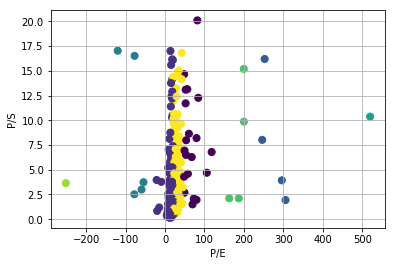

In [12]:
plt.scatter(X3[:, 0], X3[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/E')
plt.ylabel('P/S')
plt.grid(True)
plt.show()

# Analysis 4: Earnings/Share vs. Price/Book  

### Earnings/Share (EPS)
- Indicator of a company's profitability
- Metric used to describe how the market values each dollar of profit for a particular stock
- https://www.investopedia.com/terms/e/eps.asp

### Price/Book (P/B)
- ratio of market value of a stock to its bookvalue
- P/B < 1.0 is typically considered a good investment
- P/B < 3.0 is typically used as a benchmark
- https://www.investopedia.com/terms/p/price-to-bookratio.asp

### The Cluster
- EPS vs. P/B
- Desired cluster: High EPS, P/B < 3.0



In [13]:
# Create Array of Samples "X4" for Price/Book vs. Earnings/Share
X4_df = spdata.loc[:, spdata.columns.intersection(['Price/Book', 'Earnings/Share'])]
X4_df.head()
X4 = X4_df.values

In [14]:
# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X4)

# Predict the clusters
predicted_clusters = kmeans.predict(X4)

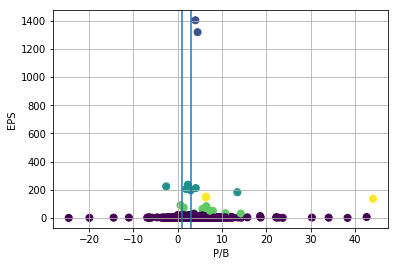

In [15]:
plt.scatter(X4[:, 0], X4[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('EPS')
plt.axvline(x=1)
plt.axvline(x=3)
plt.grid(True)
plt.show()

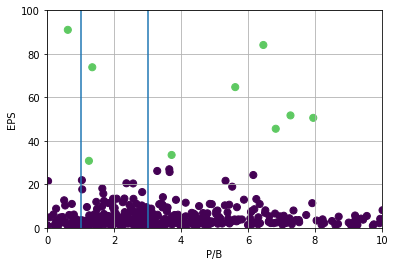

In [16]:
plt.scatter(X4[:, 0], X4[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('P/B')
plt.ylabel('EPS')
plt.xlim(0,10)
plt.ylim(0,100)
plt.axvline(x=1)
plt.axvline(x=3)
plt.grid(True)
plt.show()

# Analysis 5: Price/Earnings vs. Earnings/Share  

### Price/Earnings (P/E) 
- Higher values typically indicate that investors expect future growth
- Better when used to compare stocks within the same industry
- https://www.investopedia.com/terms/p/price-earningsratio.asp

### Earnings/Share (EPS)
- Indicator of a company's profitability
- Metric used to describe how the market values each dollar of profit for a particular stock
- https://www.investopedia.com/terms/e/eps.asp


### The Cluster
- Desired cluster: High P/E, High EPS

In [17]:
# Create Array of Samples "X5" for Price/Earnings vs. Earnings/Share
X5_df = spdata.loc[:, spdata.columns.intersection(['Earnings/Share', 'Price/Earnings'])]
X5_df.head()
X5 = X5_df.values

# Use n_clusters=4 as the k value
kmeans = KMeans(n_clusters=10, n_init=50, max_iter=100000)

# Fit the model to the data
kmeans.fit(X5)

# Predict the clusters
predicted_clusters = kmeans.predict(X5)

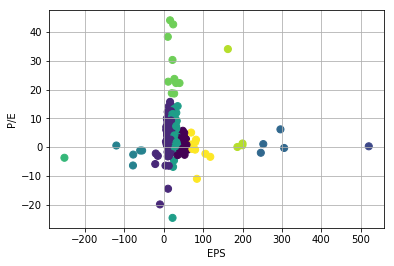

In [18]:
plt.scatter(X5[:, 0], X5[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.xlabel('EPS')
plt.ylabel('P/E')
plt.grid(True)
plt.show()

# Tableau Visualizations

https://public.tableau.com/profile/yahia4464#!/vizhome/SMUFINALPROJECT/Dashboard1


# Random Forest Classifier

- A random forest decision tree is implemented to build a model for classification of stock buying decisions
- P/B, P/E, EPS, P/S are used as input features for the Random Forest Classifier

### User Defined Decisions
- A user defined function is used to determine stock classification
- From the kmeans clustering, Price/Earnings (P/E)  and Earnings per Share (EPS) were selected for classification for the target output

### Classifications

- 1. Growth: P/E ≥ 150
- 2. Low Profit: 0 < P/E < 150, 0 < EPS < 15 
- 3. Profitable: 0 < P/E < 150, EPS ≥ 15
- 4. Not Profitable: P/E < 0

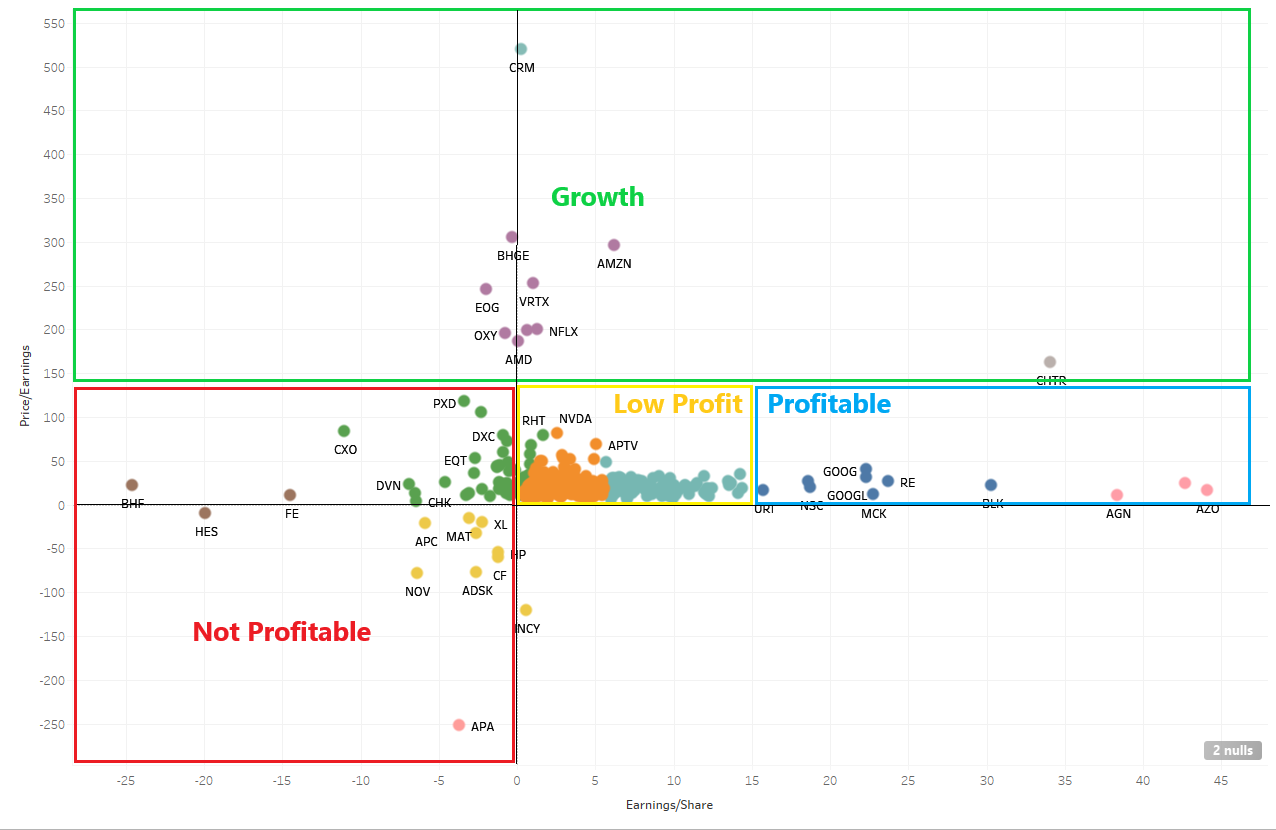

In [19]:
# Create an Array of Classifications for each stock based on P/E and EPS
classifications = []

for row in range(len(spdata)):
    
    a = spdata.iloc[row]['Price/Earnings']
    b = spdata.iloc[row]['Earnings/Share']
    
    if a > 150:
        classifications.append("Growth")
    elif (0 < a < 150) & (0 < b < 15):
        classifications.append("Low_Profit")
    elif (b > 15):
        classifications.append("Profitable")
    else:
        classifications.append("Not_Profitable")   

In [20]:
# DataFrame with Classifications
spdata_classified = spdata
spdata_classified = spdata_classified.assign(Classification = classifications)

spdata_classified.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book,Classification
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34,Low_Profit
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35,Low_Profit
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19,Low_Profit
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14,Low_Profit
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62,Low_Profit


In [21]:
# Create DataFrame for Random Forest CLassification
spdata_test = spdata
spdata_test = spdata_test.drop(["Symbol", "Name", "Sector"], axis=1)

feature_names = spdata_test.columns

spdata_test.head()

,Price,Price/Earnings,Dividend_Yield,Earnings/Share,52_Week_High,52_Week_Low,Market_Cap,EBITDA,Price/Sales,Price/Book
0,222.89,24.31,2.33,7.92,259.77,175.49,1.387211e+11,9.048000e+09,4.39,11.34
1,60.24,27.76,1.15,1.70,68.39,48.93,1.078342e+10,6.010000e+08,3.58,6.35
2,56.27,22.51,1.91,0.26,64.60,42.28,1.021210e+11,5.744000e+09,3.74,3.19
3,108.48,19.41,2.50,3.29,125.86,60.05,1.813863e+11,1.031000e+10,6.29,26.14
4,150.51,25.47,1.71,5.44,162.60,114.82,9.876586e+10,5.643228e+09,2.60,10.62


In [22]:
# Set Target Values for Stock Classification
target = spdata_classified["Classification"]
target_names = ["Growth", "Low_Profit", "Profitable", "Not_Profitable"]

In [23]:
# Run and Test Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spdata_test, target, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\Erik\anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9758064516129032

In [24]:
metric_weights = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
metric_weights_df = pd.DataFrame(metric_weights, columns=["Weight", "Stock Metric"])
metric_weights_df

,Weight,Stock Metric
0,0.645171,Earnings/Share
1,0.135060,Price/Earnings
2,0.040415,52_Week_Low
3,0.037135,52_Week_High
4,0.034578,Price
5,0.033112,Price/Book
6,0.026482,EBITDA
7,0.025704,Price/Sales
8,0.012793,Market_Cap
9,0.009551,Dividend_Yield
